In [9]:
import numpy as np
import matplotlib.pylab as plt
import iiiraven2 as ir2
ir2.set_plot_default()

## Simulation Parameter Information

In [10]:
path = '/Users/krishna/Research/PhD/Neutrinos/MST/2018_toomanyhaloes/'

for i in range(0, 7):
    data = np.load(path + 'param_files/grid' + str(i+1) + '_counts.npz')
    if i == 0:
        as_grid = data['as_grid']*1e9
        om_grid = data['om_grid']
        mv_grid = data['mv_grid']
        count1 = data['count1']
        count2 = data['count2']
        count3 = data['count3']
    else:
        as_grid = np.concatenate([as_grid, data['as_grid']*1e9])
        om_grid = np.concatenate([om_grid, data['om_grid']])
        mv_grid = np.concatenate([mv_grid, data['mv_grid']])
        count1 = np.concatenate([count1, data['count1']])
        count2 = np.concatenate([count2, data['count1']])
        count3 = np.concatenate([count3, data['count1']])

count_avg = (count1 + count2 + count3)/3.

In [11]:
as_fid, om_fid, mv_fid = 2., 0.3, 0.
as_mock, om_mock, mv_mock = 2.13, 0.3175, 0.06

In [12]:
for i in range(0, 4):
    data = np.loadtxt(path + 'big_data/grid1_' + str(i+1) + '_log_param.txt', unpack=True)
    for j in range(0, len(data[0])):
        if j+1 != data[0][j]-250*i:
            print j+1, data[0][j]
    print len(data[0])
    _s8 = data[3][:250]
    if i == 0:
        s8_grid = _s8
    else:
        s8_grid = np.concatenate([s8_grid, _s8])

for i in range(1, 7):
    data = np.loadtxt(path + 'big_data/grid' + str(i+1) + '1_log_param.txt', unpack=True)
    for j in range(0, len(data[0])):
        if j+1 != data[0][j]:
            print j+1, data[0][j]
    print len(data[0])
    _s8 = data[3]
    if i == 0:
        s8_grid = _s8
    else:
        s8_grid = np.concatenate([s8_grid, _s8])

250
276
253
250
100
200
187
50
10
27


In [13]:
# Gotten directly from log_param file

s8_fid = 0.773774154477
s8_mock = 0.826049724741

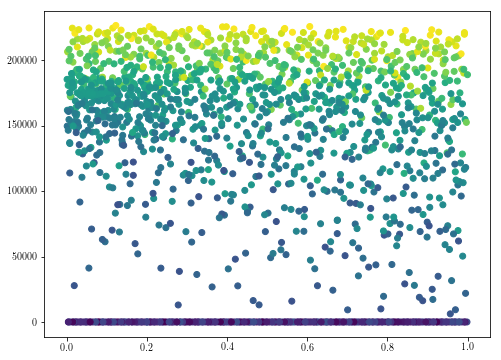

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(s8_grid, count_avg, c=om_grid)
plt.show()

In [15]:
num_haloes = 100000. + 10000
condition = np.where((count1 > num_haloes) & (count2 > num_haloes) & (count3 > num_haloes))[0]
as_grid = as_grid[condition]
om_grid = om_grid[condition]
mv_grid = mv_grid[condition]
s8_grid = s8_grid[condition]

In [16]:
np.savez('param_info.npz',
         as_grid=as_grid, om_grid=om_grid, mv_grid=mv_grid, s8_grid=s8_grid,
         as_fid=as_fid, om_fid=om_fid, mv_fid=mv_fid, s8_fid=s8_fid,
         as_mock=as_mock, om_mock=om_mock, mv_mock=mv_mock, s8_mock=s8_mock)

## Porting Simulations

Check 'get_pkbkmst' works.

In [10]:
import get_pkbkmst

which_method = 'pk_bk_mst'
condition_mst = [0, 1]
usefull = True

fid_data = get_pkbkmst.get_fiducial(which_method, condition_mst, usefull=usefull)
mock_data = get_pkbkmst.get_mock(which_method, condition_mst, usefull=usefull)
grid_data = get_pkbkmst.get_grid(which_method, condition_mst, usefull=usefull)

Getting Fiducial : |####################| 100% 
Getting Mock : |####################| 100% 
Getting Grid1 : |####################| 100% 
Getting Grid2 : |####################| 100% 
Getting Grid3 : |####################| 100% 
Getting Grid4 : |####################| 100% 
Getting Grid5 : |####################| 100% 
Getting Grid6 : |####################| 100% 


IOError: [Errno 2] No such file or directory: '/Users/krishna/Research/PhD/Neutrinos/MST/2018_toomanyhaloes/pkbkmst/halo_grid71_1mst_mean.npz'

Function works!

In [10]:
print len(grid_data), len(as_grid)

1144 1144


In [11]:
as_grid, om_grid, mv_grid, s8_grid = get_pkbkmst.get_grid_params()
as_mock, om_mock, mv_mock, s8_mock = get_pkbkmst.get_mock_params()
as_fid, om_fid, mv_fid, s8_fid = get_pkbkmst.get_fiducial_params()